In [1]:
from sympy import *
init_printing(use_latex=True)

# Derivation of Double Pendulum Equations of Motion

The objective here was to use sympy to derive the equations of motion to later be used in the Lua simulation elsewhere in this repository. I'm aware that Sympy has a built in Lagrangian solver, however I wanted to do it by hand to learn the system and also demonstrate some basic Lagrangian mechanics.

### Lagrangian Mechanics

The idea behind Lagrangian mechanics is to define generalised coordinates specific to this system that forgo the need to have constraint forces. In this double pendulum simulation we define our coordinates as theta1 and theta2. Since the two pendulum bobs move in circles, these two coordinates will suffice and never need constraint forces.

We then define a 'Lagrangian' for the system, which relates the energies. Using this we can solve for the equations of motion. Continue reading and I'll explain as we go.

[Make sure to read more about this on the wikipedia page](https://en.wikipedia.org/wiki/Lagrangian_mechanics)

In [10]:
# Define various symbols we need, we are working with a symbolic calculator
l1, l2, g, m1, m2, t, symL = symbols("l_1 l_2 g m_1 m_2 t L")

In [3]:
# Theta is not a variable, but a function of t. Our objective is to find the second derivatives of theta1 and theta2
theta1 = Function('theta1')
theta2 = Function('theta2')
theta1 = theta1(t)
theta2 = theta2(t)

In [4]:
# These are the conversions to cartesian coordinates. We need to know them so we cna find our energies
x1 = l1*sin(theta1)
y1 = -l1*cos(theta1)
x2 = l1*sin(theta1)+l2*sin(theta2)
y2 = -l1*cos(theta1)-l2*cos(theta2)

## Finding Our Energies

It is here we find our potential (V) and kinetic energies (T). It is as simple as using the known formulas and adding together the energies for each body (pendulum bob in this case).

Our kinetic energy requires us to find the square of the velocities, as we do below. It quickly becomes apparent why the symbolic calculator is useful, doing this out by hand is a pain.

In [5]:
V = m1*g*y1+m2*g*y2
V

In [6]:
dx1 = diff(x1, t)
dy1 = diff(y1, t)
dx2 = diff(x2, t)
dy2 = diff(y2, t)

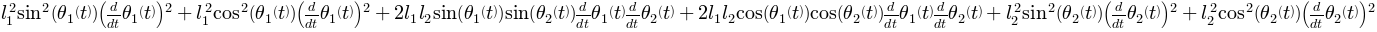

In [7]:
v1 = dx1**2+dy1**2
v2 = dx2**2+dy2**2
# For curiosity this is what v2 now looks like
expand(v2)

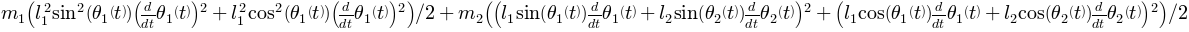

In [8]:
# Kinetic energy
T = (m1/2)*v1+(m2/2)*v2
T

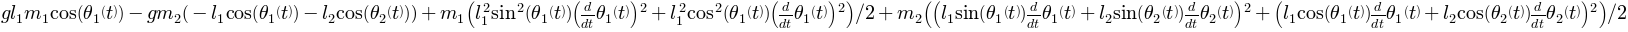

In [9]:
# This is our all important lagrangian
L = T-V
L

## Using Lagranges Equation

From now on it gets a bit hairy. I'm simply finding all the terms of the lagrangian equation. It looks like this:

![Lagrange Equation](LagrangeEquation.png)

We need to create this equation twice, once for each coordinate defined by q_j above. So for the next few cells I setup all the messy terms to be used.

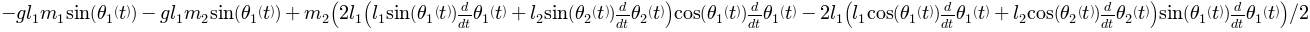

In [15]:
dLdtheta1=diff(L, theta1)
dLdtheta1

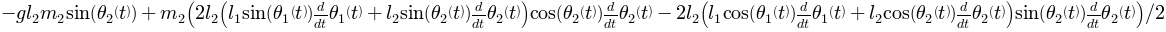

In [16]:
dLdtheta2=diff(L, theta2)
dLdtheta2

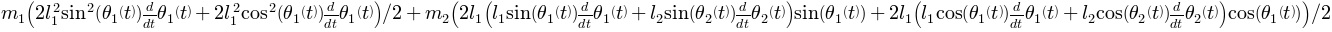

In [17]:
dLdtheta1dot = diff(L, diff(theta1, t))
dLdtheta1dot

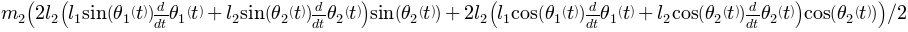

In [18]:
dLdtheta2dot = diff(L, diff(theta2, t))
dLdtheta2dot

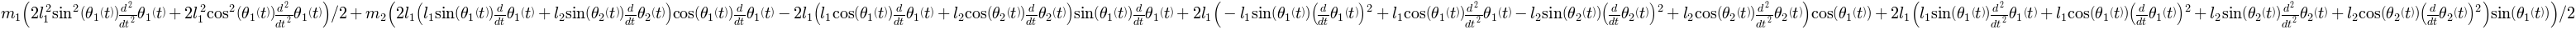

In [19]:
ddt_dLdtheta1dot = diff(dLdtheta1dot, t)
ddt_dLdtheta1dot

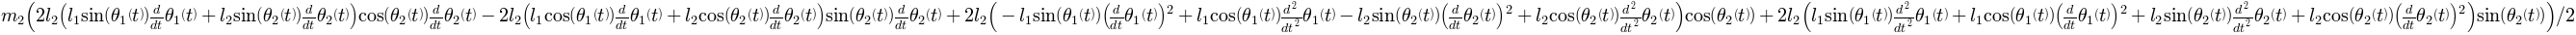

In [20]:
ddt_dLdtheta2dot = diff(dLdtheta2dot, t)
ddt_dLdtheta2dot

### Finally we have the all important equations

It's a horrible mess, but these are effectively our equations of motion. We just need to solve for the second derivative. On a side note, I once did this by hand with a pencil and paper. It's a horrible mess and it's fantastic to have something like Sympy do it for you. Solving this couldn't be easier with functions like solve(). So here we go!

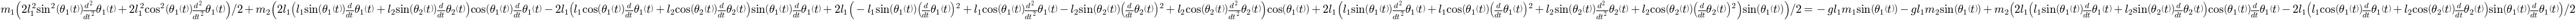

In [21]:
eq1 = Eq(ddt_dLdtheta1dot, dLdtheta1)
eq1

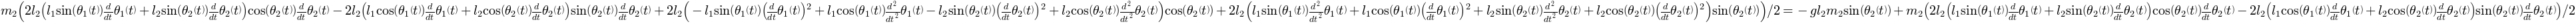

In [22]:
eq2 = Eq(ddt_dLdtheta2dot, dLdtheta2)
eq2

## Solving for the second derivatives

Look how nicely this compresses down! Admittedly it's still an absolute mess, but it's here. Although we have no solved for the two second derivatives in the next two cells, they're actually two simultaneous equations. Lets fix this

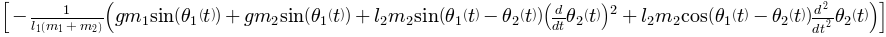

In [23]:
theta1dotdot_inTermsOftheta2dotdot = solve(eq1, diff(theta1, t, 2))
theta1dotdot_inTermsOftheta2dotdot

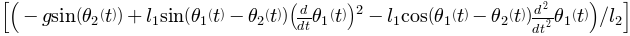

In [24]:
theta2dotdot_inTermsOftheta1dotdot = solve(eq2, diff(theta2, t, 2))
theta2dotdot_inTermsOftheta1dotdot

# Lastly

So we now substitute one equation into the other, and then solve it. Note we have to subtract thetadotdot by whatever was we on the right hand side of the equation, not shown above. This balances the equation. We then simply tell Sympy to solve for theta1dotdot, and we get our equation of motion. The same is done for theta2

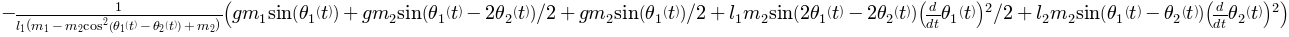

In [25]:
theta1dotdot =  theta1dotdot_inTermsOftheta2dotdot[0].subs(diff(theta2, t, 2), theta2dotdot_inTermsOftheta1dotdot[0])
theta1dotdot = solve(theta1dotdot-diff(theta1, t, 2), diff(theta1, t, 2))
theta1dotdot[0]

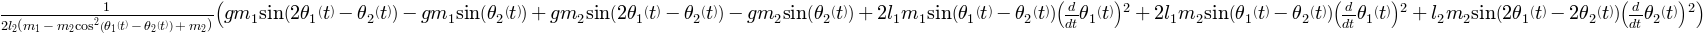

In [27]:
theta2dotdot =  theta2dotdot_inTermsOftheta1dotdot[0].subs(diff(theta1, t, 2), theta1dotdot_inTermsOftheta2dotdot[0])
theta2dotdot = solve(theta2dotdot-diff(theta2, t, 2), diff(theta2, t, 2))
theta2dotdot[0]

# We now have our equations of motion

They're horrible messy, but the above two equations define the acceleration of the the two double pendulum bobs over all time. I took these two equations and plugged them into my differential equation solver found in this repository, and I had my double pendulum simulation. 

Note that these equations are highly non-linear and impossible to solve analytically, so we need to use a numerical solving solution. I'm aware that sympy and iPython have plenty of tools for doing this solving. But the objective of this little project was to learn how to create my own differential equation solver, so I did it myself, manually. I learnt a lot in the process too!

Thanks for reading!